>  ## 1.Imprting Data


In [4]:
conda install pandas

Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [5]:
conda install statsmodels

Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [6]:
conda install scikit-learn

Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [46]:
# In this cell I will import All Libraries that I need in this project  
import sys

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import os

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
%matplotlib inline


In [8]:
DataFream = pd.read_csv ("/Users/macbookpro/Desktop/Bootcamps Project/Salaries.csv")
#just make sure can read it

DataFream

/Users/macbookpro/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (3,4,5,6,12) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.0,56120.71,198306.9,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.6,9737.0,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
148649,148650,Roy I Tillery,Custodian,0.00,0.00,0.00,0.00,0.00,0.00,2014,NaN,San Francisco,PT
148650,148651,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,NaN,San Francisco,NaN
148651,148652,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,NaN,San Francisco,NaN
148652,148653,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,NaN,San Francisco,NaN


In [10]:
print("Total number of rows in dataset: ",DataFream.shape[0])
print("Total number of columns in dataset: ",DataFream.shape[1])

Total number of rows in dataset:  148654
Total number of columns in dataset:  13


In [11]:
DataFream.shape

(148654, 13)

In [12]:
#need to know how many entries and futures do we have,and do we missing data. 
DataFream.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148049 non-null  object 
 4   OvertimePay       148654 non-null  object 
 5   OtherPay          148654 non-null  object 
 6   Benefits          112495 non-null  object 
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Notes             0 non-null       float64
 11  Agency            148654 non-null  object 
 12  Status            38119 non-null   object 
dtypes: float64(3), int64(2), object(8)
memory usage: 14.7+ MB


>  ## 2.Collect  Data and cleaning

In [13]:
# count null value
DataFream.isnull().sum()

Id                       0
EmployeeName             0
JobTitle                 0
BasePay                605
OvertimePay              0
OtherPay                 0
Benefits             36159
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              110535
dtype: int64

In [14]:
#Cleaning process
#removing null values from BasePay,Benefits, Notes, and  Status

DataFream.BasePay = DataFream.BasePay.fillna(0.00)
DataFream.Benefits = DataFream.Benefits.fillna(0.00)
DataFream.Notes = DataFream.Notes.fillna(0.0)
DataFream.Status = DataFream.Status.fillna('CA')


In [15]:
#Cleaning process

DataFream['BasePay'].replace(['Not Provided'],['0'],inplace=True)
DataFream['OvertimePay'].replace(['Not Provided'],['0'],inplace=True)
DataFream['OtherPay'].replace(['Not Provided'],['0'],inplace=True)
DataFream['Benefits'].replace(['Not Provided'],['0'],inplace=True)
DataFream['Notes'].replace(['Not Provided'],['0'],inplace=True)

In [16]:
DataFream

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,0.0,567595.43,567595.43,2011,0.0,San Francisco,CA
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,0.0,538909.28,538909.28,2011,0.0,San Francisco,CA
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,0.0,335279.91,335279.91,2011,0.0,San Francisco,CA
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.0,56120.71,198306.9,0.0,332343.61,332343.61,2011,0.0,San Francisco,CA
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.6,9737.0,182234.59,0.0,326373.19,326373.19,2011,0.0,San Francisco,CA
...,...,...,...,...,...,...,...,...,...,...,...,...,...
148649,148650,Roy I Tillery,Custodian,0.00,0.00,0.00,0.00,0.00,0.00,2014,0.0,San Francisco,PT
148650,148651,Not provided,Not provided,0,0,0,0,0.00,0.00,2014,0.0,San Francisco,CA
148651,148652,Not provided,Not provided,0,0,0,0,0.00,0.00,2014,0.0,San Francisco,CA
148652,148653,Not provided,Not provided,0,0,0,0,0.00,0.00,2014,0.0,San Francisco,CA


In [17]:

#Cleaning process
#Changing Datatype 

DataFream.BasePay = DataFream.BasePay.astype(float)
DataFream.OvertimePay = DataFream.OvertimePay.astype(float)
DataFream.OtherPay = DataFream.OtherPay.astype(float)
DataFream.Benefits = DataFream.Benefits.astype(float)

In [18]:
DataFream.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148654 non-null  float64
 4   OvertimePay       148654 non-null  float64
 5   OtherPay          148654 non-null  float64
 6   Benefits          148654 non-null  float64
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Notes             148654 non-null  float64
 11  Agency            148654 non-null  object 
 12  Status            148654 non-null  object 
dtypes: float64(7), int64(2), object(4)
memory usage: 14.7+ MB


In [19]:
DataFream.isnull().sum()

Id                  0
EmployeeName        0
JobTitle            0
BasePay             0
OvertimePay         0
OtherPay            0
Benefits            0
TotalPay            0
TotalPayBenefits    0
Year                0
Notes               0
Agency              0
Status              0
dtype: int64

In [20]:
DataFream

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,0.0,567595.43,567595.43,2011,0.0,San Francisco,CA
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,0.0,538909.28,538909.28,2011,0.0,San Francisco,CA
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,0.0,335279.91,335279.91,2011,0.0,San Francisco,CA
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,0.0,332343.61,332343.61,2011,0.0,San Francisco,CA
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,0.0,326373.19,326373.19,2011,0.0,San Francisco,CA
...,...,...,...,...,...,...,...,...,...,...,...,...,...
148649,148650,Roy I Tillery,Custodian,0.00,0.00,0.00,0.0,0.00,0.00,2014,0.0,San Francisco,PT
148650,148651,Not provided,Not provided,0.00,0.00,0.00,0.0,0.00,0.00,2014,0.0,San Francisco,CA
148651,148652,Not provided,Not provided,0.00,0.00,0.00,0.0,0.00,0.00,2014,0.0,San Francisco,CA
148652,148653,Not provided,Not provided,0.00,0.00,0.00,0.0,0.00,0.00,2014,0.0,San Francisco,CA


In [21]:
#Cleaning process
DataFream.drop(columns=['Notes', 'Status'], inplace=True)


In [22]:
#Cleaning process
#duplicated columns
DataFream.drop(columns=['TotalPayBenefits'], inplace=True)

In [23]:
DataFream

#DataFream.set_index('Id', inplace=True)

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,Year,Agency
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,0.0,567595.43,2011,San Francisco
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,0.0,538909.28,2011,San Francisco
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,0.0,335279.91,2011,San Francisco
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,0.0,332343.61,2011,San Francisco
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,0.0,326373.19,2011,San Francisco
...,...,...,...,...,...,...,...,...,...,...
148649,148650,Roy I Tillery,Custodian,0.00,0.00,0.00,0.0,0.00,2014,San Francisco
148650,148651,Not provided,Not provided,0.00,0.00,0.00,0.0,0.00,2014,San Francisco
148651,148652,Not provided,Not provided,0.00,0.00,0.00,0.0,0.00,2014,San Francisco
148652,148653,Not provided,Not provided,0.00,0.00,0.00,0.0,0.00,2014,San Francisco


In [ ]:
#Make sure if we have duplicated data or not.
#Cleaning process

DataFream.EmployeeName.duplicated().sum()

In [24]:
#Cleaning process
#print duplicated

DataFream[DataFream['EmployeeName'].duplicated()]

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,Year,Agency
43,44,MICHAEL THOMPSON,FIREFIGHTER,123013.02,111729.65,15575.26,0.0,250317.93,2011,San Francisco
359,360,JOHN MURPHY,"LIEUTENANT, FIRE DEPARTMENT",123104.98,54870.85,15365.22,0.0,193341.05,2011,San Francisco
435,436,WILLIAM MCFARLAND,"LIEUTENANT, FIRE DEPARTMENT",123105.01,50096.28,15549.00,0.0,188750.29,2011,San Francisco
847,848,SANDRA TONG,"CAPTAIN, EMERGENCYCY MEDICAL SERVICES",140546.88,20407.79,13637.71,0.0,174592.38,2011,San Francisco
864,865,WILLIAM LEE,DEPUTY DIRECTOR IV,174229.44,0.00,0.00,0.0,174229.44,2011,San Francisco
...,...,...,...,...,...,...,...,...,...,...
148648,148649,Leon Walker,Custodian,0.00,0.00,0.00,0.0,0.00,2014,San Francisco
148649,148650,Roy I Tillery,Custodian,0.00,0.00,0.00,0.0,0.00,2014,San Francisco
148650,148651,Not provided,Not provided,0.00,0.00,0.00,0.0,0.00,2014,San Francisco
148651,148652,Not provided,Not provided,0.00,0.00,0.00,0.0,0.00,2014,San Francisco


In [25]:
#Looking for the caus of the duplicated 
DataFream[DataFream['EmployeeName'] == 'Not provided']

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,Year,Agency
148646,148647,Not provided,Not provided,0.0,0.0,0.0,0.0,0.0,2014,San Francisco
148650,148651,Not provided,Not provided,0.0,0.0,0.0,0.0,0.0,2014,San Francisco
148651,148652,Not provided,Not provided,0.0,0.0,0.0,0.0,0.0,2014,San Francisco
148652,148653,Not provided,Not provided,0.0,0.0,0.0,0.0,0.0,2014,San Francisco


In [26]:
#Looking for the caus of the duplicated 
#Cleaning process

DataFream.Id.duplicated().sum()


0

In [27]:
DataFream['JobTitle'].unique()

array(['GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY',
       'CAPTAIN III (POLICE DEPARTMENT)',
       'WIRE ROPE CABLE MAINTENANCE MECHANIC', ..., 'Conversion',
       'Cashier 3', 'Not provided'], dtype=object)

In [28]:
len(DataFream['JobTitle'].unique())

2159

### Emoloeeys just have the same names as result shwoed above Id dose not have duplicated value.


In [29]:
DataFream.describe()

,Id,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,Year
count,148654.000000,148654.000000,148654.000000,148654.000000,148654.000000,148654.000000,148654.000000
mean,74327.500000,66053.729288,5065.923568,3648.669115,18924.232839,74768.321972,2012.522643
std,42912.857795,42886.711158,11454.256594,8056.515703,17165.279495,50517.005274,1.117538
min,1.000000,-166.010000,-0.010000,-7058.590000,-33.890000,-618.130000,2011.000000
25%,37164.250000,32792.545000,0.000000,0.000000,0.000000,36168.995000,2012.000000
50%,74327.500000,64861.600000,0.000000,811.170000,23214.020000,71426.610000,2013.000000
75%,111490.750000,94605.740000,4657.632500,4235.907500,33468.980000,105839.135000,2014.000000
max,148654.000000,319275.010000,245131.880000,400184.250000,96570.660000,567595.430000,2014.000000


as we can see ther are - values in min  need to coplite cleing process. 

In [30]:
# Cleaning process
# delet the - values 

DataFream[DataFream['BasePay'] < 0].head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,Year,Agency
72832,72833,Irwin Sidharta,Junior Clerk,-166.01,249.02,0.0,6.56,83.01,2012,San Francisco
72865,72866,Robert Scott,Junior Clerk,-121.63,182.70,0.0,5.44,61.07,2012,San Francisco
72872,72873,Chung Huey Kung,Junior Clerk,-109.22,163.83,0.0,4.32,54.61,2012,San Francisco
72874,72875,Jordan Li,Junior Clerk,-106.60,159.90,0.0,4.66,53.30,2012,San Francisco
72878,72879,Richard Jackson,Junior Clerk,-101.88,153.08,0.0,4.55,51.20,2012,San Francisco


In [31]:
# Cleaning process
# delet the - values 

DataFream[DataFream['OvertimePay'] < 0].head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,Year,Agency
90714,90715,Claudia M Sanchez,Senior Eligibility Worker,75033.03,-0.01,1540.0,28864.64,76573.02,2013,San Francisco


In [32]:
# Cleaning process
# delet the - values 

DataFream[DataFream['OtherPay'] < 0].head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,Year,Agency
84969,84970,Pei Meng,IS Business Analyst-Principal,101274.51,0.00,-7058.59,34583.40,94215.92,2013,San Francisco
93200,93201,Jose A Lemus,Custodial Supervisor,66744.00,2234.40,-9.60,26889.04,68968.80,2013,San Francisco
96168,96169,John G Alexander,Gardener,59733.32,46.76,-46.76,25863.91,59733.32,2013,San Francisco
107184,107185,Amelie E Bullard,Special Nurse,6932.50,0.00,-50.19,418.03,6882.31,2013,San Francisco
148653,148654,Joe Lopez,"Counselor, Log Cabin Ranch",0.00,0.00,-618.13,0.00,-618.13,2014,San Francisco


In [33]:
# Cleaning process
# delet the - values 

DataFream[DataFream['Benefits'] < 0].head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,Year,Agency
110528,110529,Timothy E Gibson,Police Officer 3,0.0,0.0,0.00,-2.73,0.00,2013,San Francisco
110529,110530,Mark E Laherty,Police Officer 3,0.0,0.0,0.00,-8.20,0.00,2013,San Francisco
110530,110531,David P Kucia,Police Officer 3,0.0,0.0,0.00,-33.89,0.00,2013,San Francisco
144099,144100,Leticia Villacampa,Secretary 2,0.0,0.0,9991.77,-13.80,9991.77,2014,San Francisco


In [34]:
# Cleaning process
# delet the - values 

DataFream[DataFream['TotalPay'] < 0].head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,Year,Agency
148653,148654,Joe Lopez,"Counselor, Log Cabin Ranch",0.0,0.0,-618.13,0.0,-618.13,2014,San Francisco


In [35]:
# Cleaning process
# delet the - values
DataFream.drop(index = DataFream[DataFream['BasePay'] < 0].index, inplace=True)
DataFream.drop(index = DataFream[DataFream['OvertimePay'] < 0].index, inplace=True)
DataFream.drop(index = DataFream[DataFream['OtherPay'] < 0].index, inplace=True)
DataFream.drop(index = DataFream[DataFream['Benefits'] < 0].index, inplace=True)
DataFream.drop(index = DataFream[DataFream['TotalPay'] < 0].index, inplace=True)

In [36]:
DataFream.describe()

,Id,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,Year
count,148633.000000,148633.000000,148633.000000,148633.000000,148633.000000,148633.000000,148633.000000
mean,74325.229613,66060.984555,5066.614264,3649.159407,18926.122103,74776.758227,2012.522636
std,42914.584650,42883.873386,11454.916998,8056.915870,17165.212525,50514.358835,1.117589
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2011.000000
25%,37159.000000,32819.530000,0.000000,0.000000,0.000000,36178.330000,2012.000000
50%,74328.000000,64867.540000,0.000000,811.800000,23220.670000,71430.240000,2013.000000
75%,111494.000000,94611.000000,4658.810000,4237.030000,33469.400000,105846.070000,2014.000000
max,148653.000000,319275.010000,245131.880000,400184.250000,96570.660000,567595.430000,2014.000000


## las look for the data to make shore data is cleand 

In [37]:
DataFream.groupby(["Year"]).mean()["BasePay"]


Year
2011    63595.956517
2012    65456.016752
2013    68516.171889
2014    66560.929654
Name: BasePay, dtype: float64

In [38]:
#Looking for the caus of the duplicated 
# groupby()  to split the data into groups based on some criteria. 
#print duplicated as year 

# applying groupby() function to
# group the data on team value.
Orgdf = DataFream.groupby(['Year','Agency','JobTitle','Id'])

# Let's print the first entries
# in all the groups formed.
Orgdf.first()

EmployeeName  \
Year Agency        JobTitle              Id                            
2011 San Francisco ACCOUNT CLERK         20766        NAPOLEON VIRAY   
                                         20868      BERNADETTE RAMOS   
                                         21639           SUSAN CHANG   
                                         22973      OLIVIA BOUDREAUX   
                                         24133            LI-XIN CAI   
...                                                              ...   
2014 San Francisco X-Ray Laboratory Aide 141977   Boniface N Emelife   
                                         143294           Qifan Shen   
                                         143521       Karna R Thomas   
                                         143632  Patricia L Galdamez   
                   Youth Comm Advisor    138459         Phimy Truong   

                                                  BasePay  OvertimePay  \
Year Agency        JobTitle              Id                              
2011 San Francisco ACCOUNT CLERK         20766   60838.20         0.00   
                                         20868   49777.81     10753.06   
                                         21639   51306.28      5406.34   
                                         22973   49778.15      3811.68   
                                         24133   49777.80      1390.45   
...                                                   ...          ...   
2014 San Francisco X-Ray Laboratory Aide 141977  19031.51         0.00   
                                         143294  12240.06         0.00   
                                         143521  11077.60         0.00   
                                         143632  11156.12         0.00   
                   Youth Comm Advisor    138459  32417.42         0.00   

                                                 OtherPay  Benefits  TotalPay  
Year Agency        JobTitle              Id                                    
2011 San Francisco ACCOUNT CLERK         20766       0.00      0.00  60838.20  
                                         20868       0.00      0.00  60530.87  
                                         21639    1814.58      0.00  58527.20  
                                         22973    1084.76      0.00  54674.59  
                                         24133     624.00      0.00  51792.25  
...                                                   ...       ...       ...  
2014 San Francisco X-Ray Laboratory Aide 141977      0.00    190.32  19031.51  
                                         143294    525.48    127.67  12765.54  
                                         143521    677.34    117.54  11754.94  
                                         143632    185.73    113.42  11341.85  
                   Youth Comm Advisor    138459   4048.49  15545.28  36465.91  

[148633 rows x 6 columns]

The output of the cleaning Data fream

# EDA

> # Overview About Features

- What are the relationships between features in a visually-interpretable way?

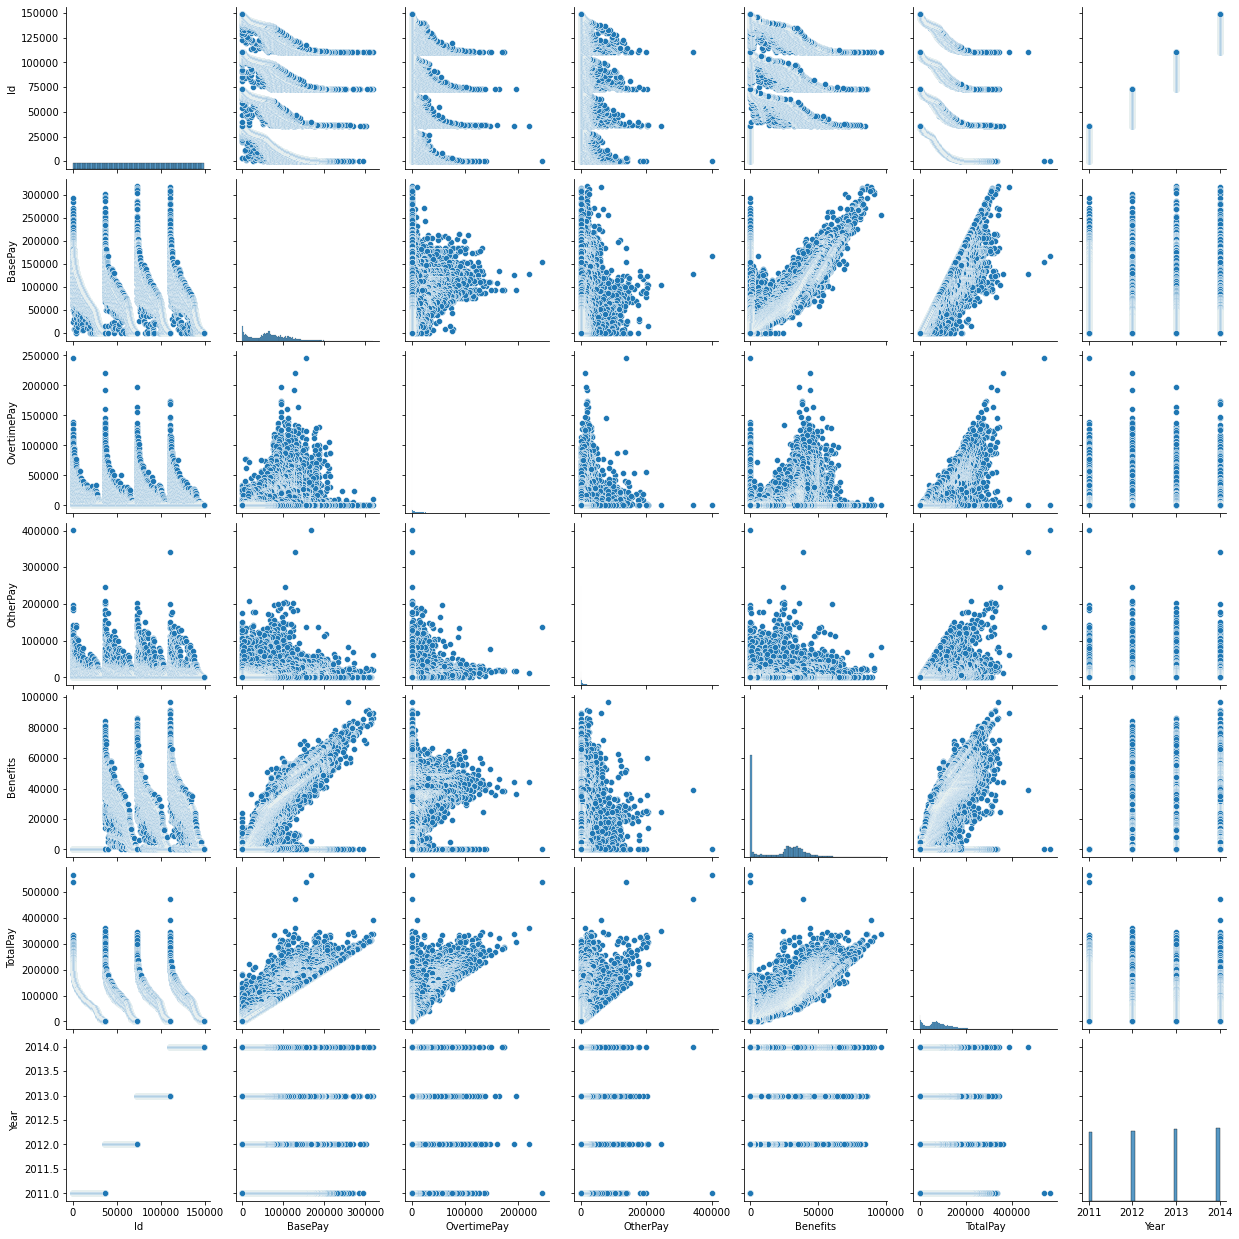

In [39]:
#sns.pairplot(DataFream , diag_kind="kde", hue="target");
sns.pairplot(DataFream);

In [ ]:
def manager_string(title):
    if 'manager' in title.lower():
        return True
    else:
        return False

In [ ]:
#3df= DataFream['Title_len'] = DataFream['JobTitle'].apply(len)
#df

In [40]:
sum(DataFream['JobTitle'].apply(lambda x: manager_string(x)))

NameError: name 'manager_string' is not defined

> #  The majority of budget spent in different years:


- What is the Totalpay in each years  in a visually-interpretable way?

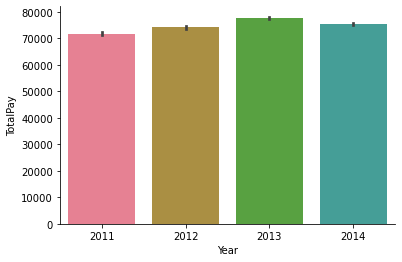

In [43]:
sns.barplot(x = 'Year',y='TotalPay',data=DataFream,palette = sns.color_palette("husl"));
sns.despine()

- What is the Benefits in each years  in a visually-interpretable way?

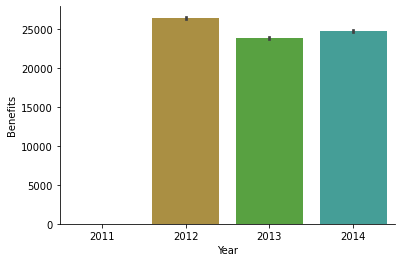

In [44]:
sns.barplot(x = 'Year',y='Benefits',data=DataFream,palette = sns.color_palette("husl"));
sns.despine()

- What is the BasePay in each years  in a visually-interpretable way?

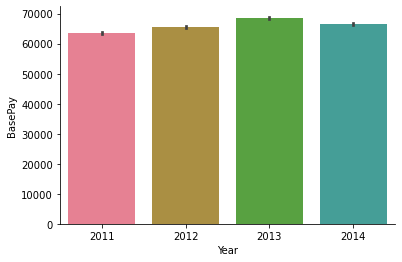

In [41]:
sns.barplot(x = 'Year',y='BasePay',data=DataFream,palette = sns.color_palette("husl"));
sns.despine()

- What is the OtherPay in each years  in a visually-interpretable way?

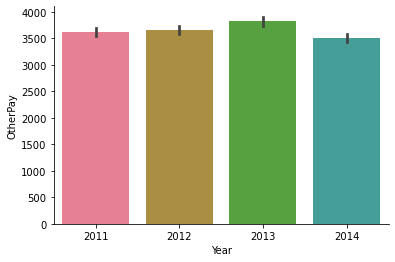

In [42]:
sns.barplot(x = 'Year',y='OtherPay',data=DataFream,palette = sns.color_palette("husl"));
sns.despine()


- What is Highest amount of OvertimePay?


In [ ]:
sns.barplot(x = 'Year',y='OvertimePay',data=DataFream,palette = sns.color_palette("husl"));
sns.despine()

DataFream["OvertimePay"].max()

In [ ]:
sns.histplot(DataFream['BasePay'],bins=8);
sns.despine()

In [ ]:
sns.barplot(x = 'OvertimePay',
            y = 'BasePay',
            hue = 'OvertimePay',
            data = DataFream)[:20]

In [ ]:
jobcount = DataFream ['JobTitle'].value_counts()[:20]
sns.barplot(x=jobcount, y=jobcount.keys())


- How many emoloeeys in each years?

In [ ]:
DataFream[DataFream['Year']==2011]['Id'].value_counts().sum()

In [ ]:
DataFream[DataFream['Year']==2012]['Id'].value_counts().sum()

In [ ]:
DataFream[DataFream['Year']==2013]['Id'].value_counts().sum()

In [ ]:
DataFream[DataFream['Year']==2014]['Id'].value_counts().sum()

In [ ]:
DataFream[DataFream['Year']==2011]['JobTitle'].value_counts().sum()

In [ ]:
DataFream[DataFream['Year']==2012]['JobTitle'].value_counts().sum()

- what is the number of emoloyess in each year? 

In [ ]:
value_counts_Year = DataFream['Year'].value_counts().head(30)
df_value_counts_Year = pd.DataFrame(value_counts_Year)
df_value_counts_Year = df_value_counts_Year.reset_index()
df_value_counts_Year.columns = ['Year', 'Number of people']
df_value_counts_Year['Year'] = df_value_counts_Year['Year']
df_value_counts_Year

In [ ]:
sns.pairplot(df_value_counts_Year);

In [ ]:
print('Total number of unique values in Job-Title column are:',DataFream['JobTitle'].nunique())
print('Total number of unique values in Agency column are:',DataFream['Agency'].nunique())
print('Total number of unique values in Year column are:',DataFream['Year'].nunique())

- How many emploeeys in one job title?


In [ ]:
print("Job-Title:",DataFream['JobTitle'].unique())
print("Agency:",DataFream['Agency'].unique())
print("Year:",DataFream['Year'].unique())

In [ ]:
DataFream['JobTitle'] = DataFream['JobTitle'].str.lower()
value_counts = DataFream['JobTitle'].value_counts().head(100)

df_value_counts = pd.DataFrame(value_counts)
df_value_counts = df_value_counts.reset_index()
df_value_counts.columns = ['Job Title', 'Number of people in that job']
df_value_counts['Job Title'] = df_value_counts['Job Title'].str.capitalize()
df_value_counts

- What is the TotalPay by JobTitle


In [ ]:
#display(DataFream[["JobTitle","TotalPay","Year"]])
        
display(DataFream[["JobTitle","TotalPay","Year",]].groupby(["JobTitle","Year"]).agg(["max",'mean',"min"]).style.background_gradient(cmap="CMRmap_r"))

In [48]:
df = pd.read_csv('/Users/macbookpro/Desktop/Bootcamps Project/Salary.csv')


In [49]:
df

,YearsExperience,BasePay
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891
5,2.9,56642
6,3.0,60150
7,3.2,54445
8,3.2,64445
9,3.7,57189


> # linear regression

In [50]:
x=df.iloc[:,:1].values
#x

In [51]:
y=df.iloc[:,1:].values
#y

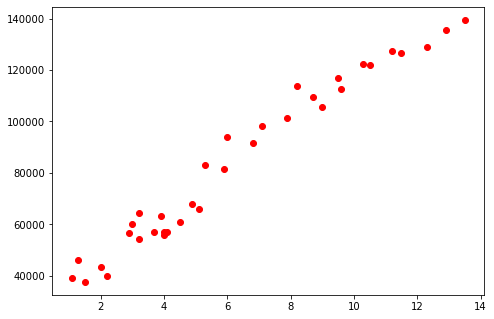

In [52]:

fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(x,y,color='r')

In [53]:
#Test dataset and trin dataset 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

The history saving thread hit an unexpected error (OperationalError('unable to open database file')).History will not be written to the database.


In [54]:
regressor= LinerRegression()

NameError: name 'LinerRegression' is not defined

In [ ]:
regressor.fit(x_train,y_train)

In [ ]:
y_pred=regressor.predict(x_test)

In [ ]:
y_pred

In [ ]:
plt.scatter(x,y,color='r')
plt.polt(x,regressor.predict(x),color='blue')

In [ ]:
poly=polynomiaFeatures(degree=2)
x_poly=poly.fit_trainsform(x)

In [ ]:
regressor.fit(x_poly,y)

In [ ]:
plt.scatter(x,y,color='r')
plt.polt(x,regressor.predict(poly.fit_trainsform(x)),color='blue')

In [ ]:
y_pred=regressor.predict(poly.fit_trainsform(x))

In [ ]:
y_pred

In [ ]:
y